## Geospatial Clustering with Python

Geospatial clustering is the process of grouping geographical points, such as delivery locations, store addresses, or sensor coordinates, into clusters based on their physical proximity to the Earth‚Äôs surface.

## What is Geospatial Clustering?

At its core, geospatial clustering is just unsupervised learning applied to latitude and longitude data, but the goal is always the same: to find meaningful groupings or patterns in spatial data to make location-based decisions smarter.

Let‚Äôs look at some applications of geospatial clustering:

* **Logistics:** When you want to create delivery zones.
* **Retail:** When you want to identify dense areas of customer activity to open a new store.
* **Urban planning:** When you want to detect high-demand zones for public transport.
* **Crime analysis:** When you want to find crime hotspots.

All these use cases have two things in common:

* You‚Äôre working with location data,
* You want to uncover natural groupings.

## Geospatial Clustering with Python

Now, let‚Äôs see how to perform geospatial clustering using Python as a Data Scientist. The dataset I will be using for this task is based on delivery pickups and drop locations

Now, let‚Äôs import the necessary Python libraries and the dataset:

In [1]:
# pip install geopy

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from geopy.distance import geodesic

In [4]:
#Importing data 
geo = pd.read_csv("deliverytime.csv")
geo.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0                    75.912471        Snack      motorcycle                24  
1                    77.813237        Snack         scooter                33  
2                    77.688400       Drinks      motorcycle                26  
3                    77.026494       Buffet      motorcycle                21  
4                    80.289982        Snack         scooter                30

Now, we will calculate the real-world distance between the pickup point and the delivery location using the geodesic formula:

In [7]:
def calculate_distance(row):
    return geodesic(
        (row["Restaurant_latitude"],row["Restaurant_longitude"]),
        (row["Delivery_location_latitude"],row["Delivery_location_longitude"])
    ).km

geo["Distance_km"] = geo.apply(calculate_distance,axis=1)

Here, we defined a function, calculate_distance, that takes a row of the dataset and computes the geographic (real-world) distance in kilometres between the restaurant and delivery coordinates using the geodesic method from the geopy library. We then used .apply() with axis=1 to apply this function row-wise and create a new column Distance_km, containing the distance for each delivery.

Now, let‚Äôs visualize all delivery locations across India on an interactive map using Plotly:

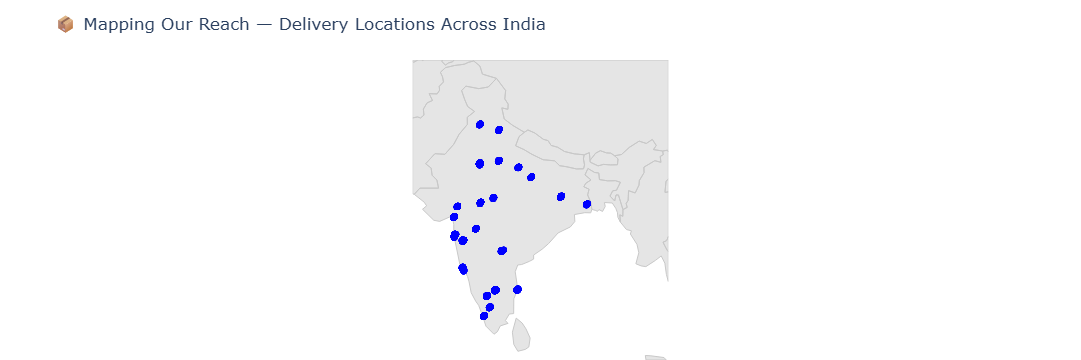

In [10]:
import plotly.graph_objects as go

vis_location = go.Figure()

vis_location.add_trace(go.Scattergeo(
                lon = geo["Delivery_location_longitude"], 
                lat = geo["Delivery_location_latitude"],
                mode= "markers",
                marker= dict(color = "blue" , size = 6 , opacity = 0.7),
                name= "Delivery Locations", 
                hovertemplate= "Lat : %{lat: .4f} <br> Lon: %{lon: .4f} <extra>Delivery</extra>"
                ))

vis_location.update_layout(
                title = "üì¶ Mapping Our Reach ‚Äî Delivery Locations Across India",
                geo = dict(
                    scope = "asia",
                    showland= True,
                    landcolor = "rgb(229, 229, 229)",
                    showcountries = True,
                    countrycolor = "rgb(200,200, 200)",
                    showlakes = False,
                    lonaxis = dict(range = [68,98]), # Focus on India
                    lataxis = dict(range = [6,38])
                ),
                margin = dict(l = 0 , r = 0 , t = 60 , b = 0),
                showlegend = False
)

vis_location.show()

The graph shows that delivery activity is concentrated predominantly in the southern and central regions of India, with notable clusters around states like Karnataka, Tamil Nadu, and Maharashtra. There‚Äôs also a moderate spread into central and eastern parts, but relatively fewer delivery points in the northern and northeastern zones, indicating potential regions for service expansion or underutilization.

## Performing K-Means Clustering

Now, let‚Äôs perform K-Means clustering on delivery locations and visualize the clusters along with their geographic centroids:

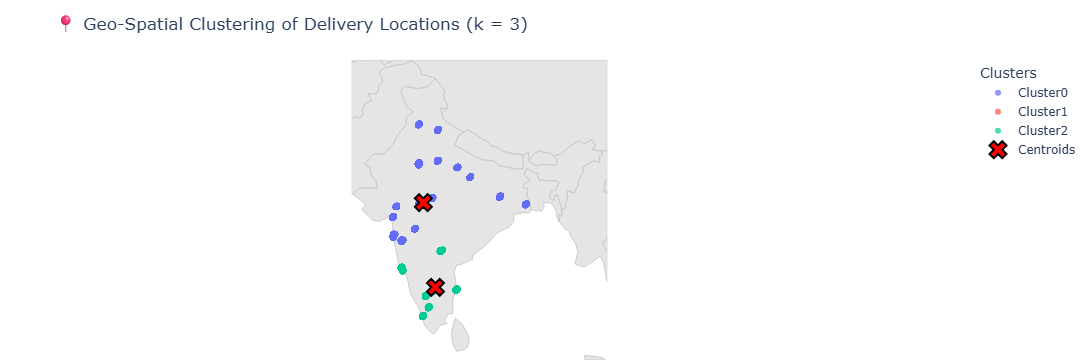

In [13]:
from sklearn.cluster import KMeans

X= geo[["Delivery_location_latitude","Delivery_location_longitude"]]
k= 3
kmean = KMeans(n_clusters= k , random_state= 42)

geo["Cluster"] = kmean.fit_predict(X)
centroids = kmean.cluster_centers_


vis_Kmeans = go.Figure()

for cluster_label in sorted(geo["Cluster"].unique()):
    cluster_geo = geo[geo["Cluster"] == cluster_label]
    vis_Kmeans.add_trace(go.Scattergeo(
                            lon = cluster_geo["Delivery_location_longitude"],
                            lat = cluster_geo["Delivery_location_latitude"],
                            mode = "markers",
                            name = f"Cluster{cluster_label}",
                            marker = dict(size = 6 , opacity = 0.7),
                            hovertemplate = "<b>Cluster:</b> %{text}<br>Lat: %{lat: .4f}<br>Lon: %{lon: .4f}<extra></extra>"
    ))


vis_Kmeans.add_trace(go.Scattergeo(
                        lon = centroids[:, 1],
                        lat = centroids[: , 0],
                        mode = "markers",
                        name = "Centroids",
                        marker = dict(size = 15 , symbol = "x" , color = "red", line = dict(width= 2 , color = "black")),
                        hovertemplate = "<b>Centroid</b><br>Lat: %{lat: .4f}<br>Lon: %{lon: .4f}<extra></extra>"
    
))

vis_Kmeans.update_layout(
                title = f"üìç Geo-Spatial Clustering of Delivery Locations (k = {k})",
                geo = dict(
                        scope = "asia",
                        showland = True,
                        landcolor = "rgb(229, 229 , 229)",
                        showcountries = True,
                        countrycolor = "rgb(204 , 204 , 204)",
                        lonaxis = dict(range = [68 , 98]),
                        lataxis = dict(range = [6 , 38])
                        ),
                legend_title = "Clusters",
                margin = dict(l = 0 , r = 0 , t = 60 , b = 0)
)

vis_Kmeans.show()

Cluster 0 (blue) represents the Central Delivery Zone, covering areas like Maharashtra and Madhya Pradesh, while Cluster 2 (green) forms the Southern Delivery Zone, focused around Tamil Nadu and Karnataka. However, Cluster 1 includes points that lie outside Indian geographic boundaries, indicating outliers or invalid coordinates likely due to GPS errors or data entry issues.

Now, let‚Äôs remove the outlier cluster and label valid delivery segments for optimized logistics planning:

In [15]:
filtered_geo = geo[geo["Cluster"] != 1]
filtered_centroids = centroids[[0,2]] # Keep Only Cluster 0 and 2


#Step 3: Map Cluster Names

cluster_labels = { 0 : "Central Delivery Zone" , 2 : "Southern Delivery Zone"}

filtered_geo["Optimized_Zone"] = filtered_geo["Cluster"].map(cluster_labels)

C:\Users\ahussain\AppData\Local\Temp\ipykernel_4808\2840852159.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Here, we filtered out Cluster 1, which represents outliers located outside India‚Äôs geographical boundaries. Then, we renamed the remaining valid clusters (Cluster 0 as ‚ÄúCentral Delivery Zone‚Äù and Cluster 2 as ‚ÄúSouthern Delivery Zone‚Äù) to give business context to the spatial segments. This final step transforms raw geospatial clusters into meaningful delivery zones that can be used for route optimization, staffing, and strategic planning.

## Summary

So, geospatial clustering is just unsupervised learning applied to latitude and longitude data, but the goal is always the same: to find meaningful groupings or patterns in spatial data to make location-based decisions smarter.